# Tutoral 03 Time
## Exploration B

In [1]:
"""
Libaries that are used 
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
rawData = pd.read_csv('https://tinyurl.com/ChrisCoDV/world_population.csv', index_col=1)
print(rawData.head())

             Country Name                                     Indicator Name  \
Country Code                                                                   
ABW                 Aruba  Population density (people per sq. km of land ...   
AND               Andorra  Population density (people per sq. km of land ...   
AFG           Afghanistan  Population density (people per sq. km of land ...   
AGO                Angola  Population density (people per sq. km of land ...   
ALB               Albania  Population density (people per sq. km of land ...   

             Indicator Code  1960        1961        1962        1963  \
Country Code                                                            
ABW             EN.POP.DNST   NaN  307.972222  312.366667  314.983333   
AND             EN.POP.DNST   NaN   30.587234   32.714894   34.914894   
AFG             EN.POP.DNST   NaN   14.038148   14.312061   14.599692   
AGO             EN.POP.DNST   NaN    4.305195    4.384299    4.464433   
A

In [27]:
"""
Function to draw plots 
"""

def displayFigure(Data, Title, selected=[], legend=0, rolling_average=0,showRolling=False,showTrend=False):
    
    
    plt.figure(figsize=(8,8))
    plt.plot(Data, linewidth=0.5)
    
    """
    If statement to show rolling average
    """
    if(showRolling == True):
        plt.gca().set_prop_cycle(None) # reset colours
        plt.plot(rolling_average[selected], linewidth=2)
    
    """
    if statement to show trend line
    """
    if(showTrend == True):
        plt.gca().set_prop_cycle(None) # reset colours
        for name in selected:
            x = np.arange(len(data[name]))
            z = np.polyfit(x, data[name].astype(np.float64), 1) # explicitly defining the numpy data type as a float64
            trend = np.poly1d(z)
            plt.plot(data.index, trend(x), linestyle='--')

    plt.ylim(ymin=0) # starts the y axis at 0
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Density(People per sq. km)", fontsize=18)
    plt.title(Title, fontsize=20)
    """
    If statement to display the legend
    """
    if(legend == 1):
        plt.legend(selected, loc=2)
    plt.show()

### Visualisation 03 B-1

In [7]:
data = rawData.transpose() # swap axis

dropSelected = ["Country Name", "Indicator Name", "Indicator Code", "1960", "2016"] # list of items to drop from data
data = data.drop(dropSelected, axis=0) # removing the columns from data
data.index = pd.to_datetime(data.index) # converts to datatime
print(data.head()) # check data

Country Code      ABW      AND      AFG      AGO      ALB      ARB      ARE  \
1961-01-01    307.972  30.5872  14.0381   4.3052  60.5766   6.9787  1.20795   
1962-01-01    312.367  32.7149  14.3121   4.3843  62.4569  7.17197  1.34258   
1963-01-01    314.983  34.9149  14.5997  4.46443  64.3292  7.37222   1.4978   
1964-01-01    316.828  37.1702  14.9016  4.54456  66.2093  7.57952  1.65335   
1965-01-01    318.667  39.4702  15.2182  4.62423  68.0581  7.79388  1.79806   

Country Code      ARG      ARM      ASM  ...      VNM      VUT  PSE      WLD  \
1961-01-01    7.65636  67.9396   102.39  ...  108.845  5.39032  NaN  23.6949   
1962-01-01    7.77862  70.3256   105.59  ...   110.98  5.56243  NaN  24.1027   
1963-01-01    7.90073  72.7231  109.415  ...  113.171  5.73929  NaN  24.6025   
1964-01-01    8.02207  75.1013  113.505  ...  115.438  5.91723  NaN  25.1063   
1965-01-01    8.14246  77.4377   117.59  ...  117.795  6.09409  NaN  25.6201   

Country Code      WSM      YEM      ZAF     

### Visualisation 03 B-2

In [8]:
data = data.reindex(data.mean().sort_values(ascending=False).index,axis=1)

Sorting the data with the highest density first

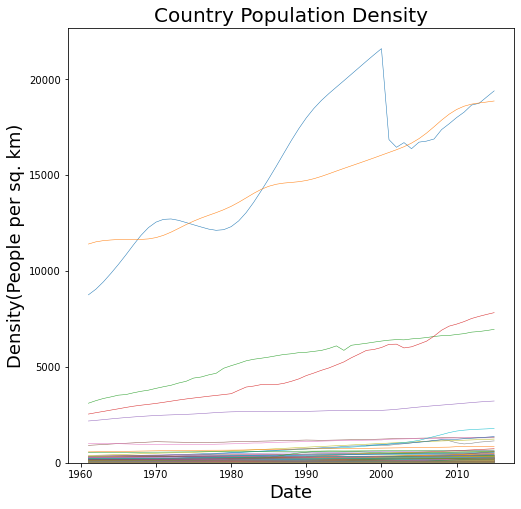

In [17]:
displayFigure(data,legend = 0, Title="Country Population Density")

After removing the legend from the plot, the data shows that MAC begins with the second highest population density in 1960 and ends with the highest density.
MAC,MCO,HKG,SGP and GIB are the countries that have the highest population densities according to the data.

With the legend removed, the graph has too much data to draw any real conclusions from the lower end of the density spectrum.

### Visualisation 03 B-3

In [10]:
selected = ["MAC","MCO","HKG","SGP","GIB"] # top 5 countries by density

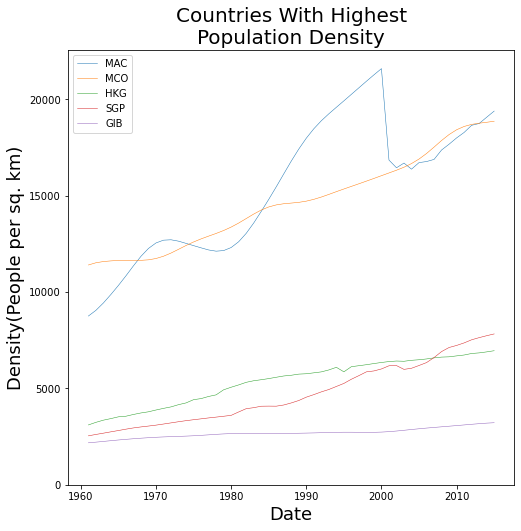

In [19]:
displayFigure(data[selected], # data with only 5 counties
          Title="Countries With Highest\nPopulation Density",
           selected=selected, # list of country codes
           legend = 1) # display the legend

With the top five most densely populated countries displayed, there is a upward trend for each one. Although this upward trend is increasing at different rates for individual countries.

There is a sudden drop in density for Macau(MAC) in 1999 and a slower decline in 1970 to 1980.

Hong Kong(HKG) and Singapore(SPG) also show a small decline in density.

### Visualisation 03 B-4

In [20]:
period = 10 # variable used to specify the number of years
rolling_average = data.rolling(window=period).mean() # using the rolling average 

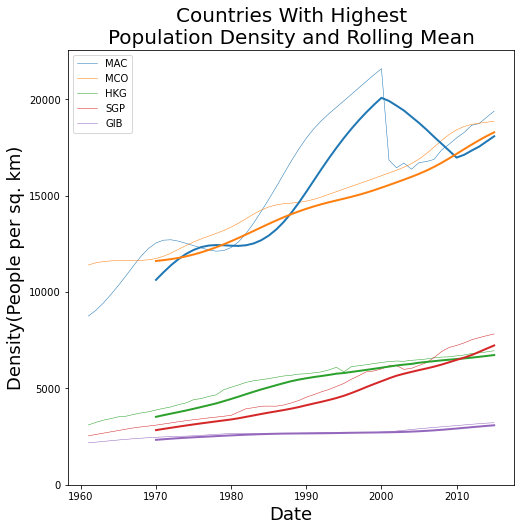

In [28]:
displayFigure(data[selected], 
           Title="Countries With Highest\nPopulation Density and Rolling Mean",
           selected=selected,
           legend = 1,
           rolling_average=rolling_average,
           showRolling=True)

Smoothing the population density over 10 year periods does not show any insights that cannot be seen without it. It does make the plot harder to read and feel more cluttered 

### Visualisation 03 B-5

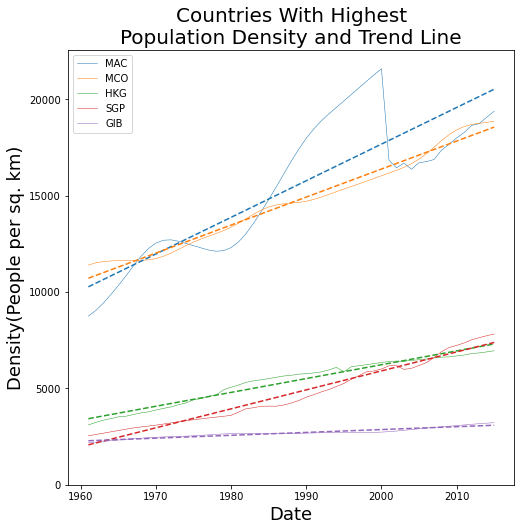

In [29]:
displayFigure(data[selected], 
           selected=selected,
           showTrend=True,
           legend = 1,
           Title="Countries With Highest\nPopulation Density and Trend Line")

By displaying a trend line there is a clear upward trend for MAC, MCO, HKG and SGP over the period shown. GIB has had a much slower increase which is difficult to excract from this trend line.

### Visualisation 03 B-6

The huge drop in population density seen for Macau(MAC) coinsides with transition of sovereignty from the then ruling Portugal to China on the 20th December 1999. However, this does not fully explain the drop in density which could be due to a number of reason such as emigration or the redrawing of the principalities area by the new Governing China which would show a decline if the area that Macau covered was made larger.